In [ ]:
#import Pytorch
import torch
from torch import nn

#IMport torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#Import matplotlib for visualization
import matplotlib.pyplot as plt

#check versions
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


In [ ]:
#Getting a dataset -> we will use fashion MNIST dataset

#SETUP TRAINING DATA
train_data = datasets.FashionMNIST(
    root = "data", #where to download data to
    train = True,  #do we want the training dataset
    download = True,  #do we want to download data
    transform = ToTensor(), #how do we want to transform the data
    target_transform=None  #how do we want to transform the labels/target
)

test_data = datasets.FashionMNIST(
    root = "data", #where to download data to
    train = False,  #do we want the training dataset
    download = True,  #do we want to download data
    transform = ToTensor(), #how do we want to transform the data
    target_transform=None  #how do we want to transform the labels/target
)

In [ ]:
len(train_data),  len(test_data)

(60000, 10000)

In [ ]:
#See the first training example
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
#Check the shape of image
image.shape

torch.Size([1, 28, 28])

In [ ]:
print(f"Tmage shape: {image.shape} -> [color_channels,Height,Width]")
print(f"Image label: {class_names[label]}")

Tmage shape: torch.Size([1, 28, 28]) -> [color_channels,Height,Width]
Image label: Ankle boot


Tmage shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

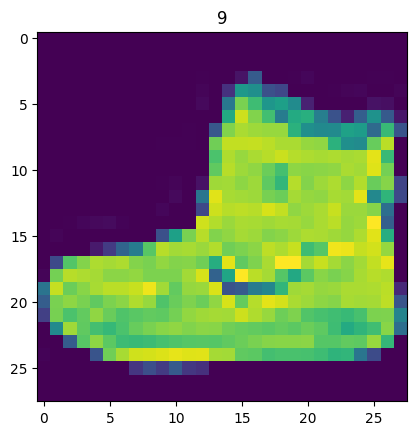

In [ ]:
#Visualize our Data
image, label = train_data[0]
print(f"Tmage shape: {image.shape}")
plt.imshow(image.squeeze())  #Squeeze is used to kill the singular dimension
#We need squeeze here because imshow is a malplotlib function which takes colour channel last or length, width as input criteria
#In our case, we have color channel first (image shape) -> so we squeeze the singular (color channel). We could have also put the color channel last and then pass an argument
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

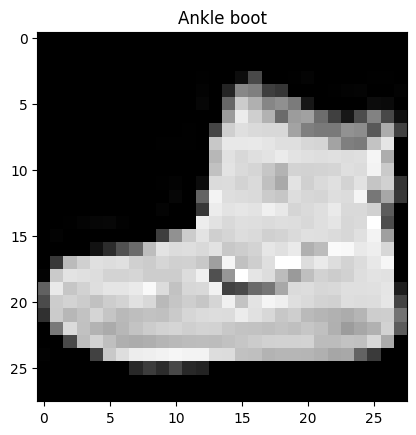

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])

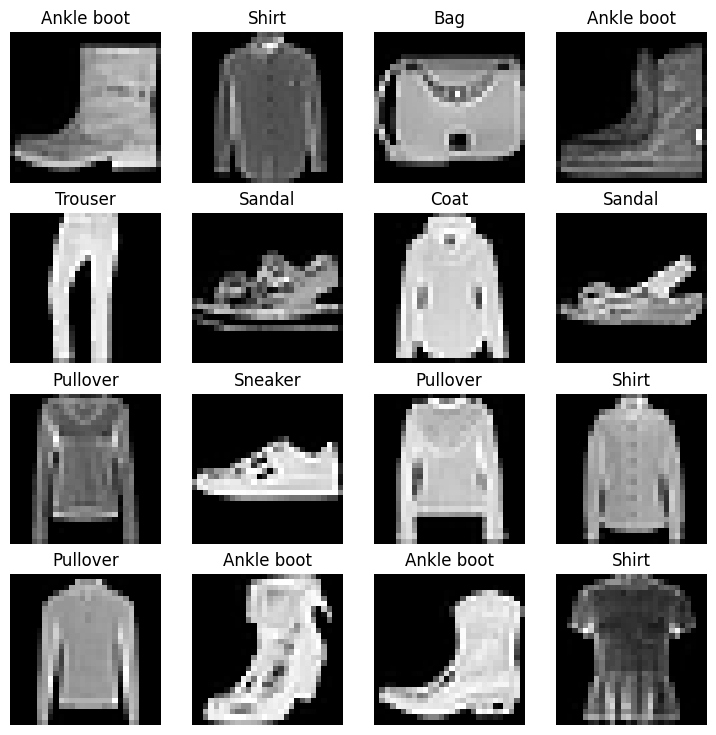

In [ ]:
#Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols + 1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
#Prepare Dataloader -> DATALOADER CONVERTS OUR DATASET INTO A PYTHON ITERABLE, more specifically to break our data points into batches
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset= train_data, batch_size= BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7893e0032c50>,
 <torch.utils.data.dataloader.DataLoader at 0x7893dfa14e80>)

In [ ]:
print(f"Dataloader: {train_dataloader, test_dataloader}")
print(f"Lenght of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Lenght of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7893e0032c50>, <torch.utils.data.dataloader.DataLoader object at 0x7893dfa14e80>)
Lenght of train_dataloader: 1875 batches of 32
Lenght of test_dataloader: 313 batches of 32


In [ ]:
#check out whats inside the training dataloader
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, labelsize: torch.Size([])


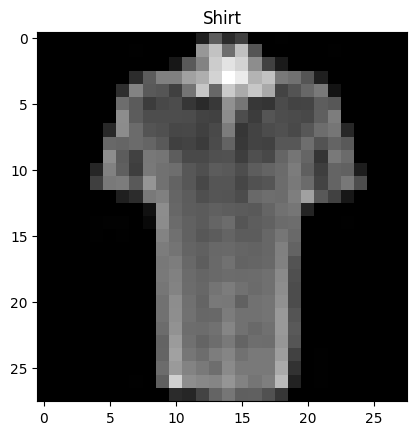

In [ ]:
#show a sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
print(f"Image size: {img.shape}")
print(f"Label: {label}, labelsize: {label.shape}")

In [ ]:
#Start with a BASELINE MODEL -> BASELINE MODEL

#CREATE A FLATTEN LAYER
flatten_model = nn.Flatten()

#Get a single sample
x = train_features_batch[0]

#Flatten the sample
output = flatten_model(x)

print(f"shape before flattening : {x.shape} -> [color_channel, height, width]")
print(f"shape after flattening: {output.shape} -> [colr_channel, height*width]")

shape before flattening : torch.Size([1, 28, 28]) -> [color_channel, height, width]
shape after flattening: torch.Size([1, 784]) -> [colr_channel, height*width]


In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_shape,out_features=hidden_units),
                                     nn.Linear(in_features=hidden_units,out_features=output_shape))
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape= 784, #28*28
    hidden_units=10,
    output_shape = len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [ ]:
#SETUP LOSS, OPTIMIZER AND EVALUATION METRICS

#Since we are working with multiclass data, we will user crossEntropyLoss Function
#Optimizer is SGD(stochastic gradient descent)
# Metrics will be accuracy since we have classification problem

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item() #Torch.eq() claculates where 2 tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

#loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
#Function to time our experiments:
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device: torch.device = None):
  total_time = end - start
  print(f"train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
#CREATE A TRAINING AND TEST LOOP

from tqdm.auto import tqdm

#SET THE SEED ANS START THE TIMER
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#Set the number of epochs
epochs = 3

#Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"EPOCH: {epoch}\n------")

  #Training
  train_loss = 0
  #Add a loop to loop throught the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    #Forward Pass
    y_pred = model_0(X)

    #claculate loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss

    #optimizer zero grad
    optimizer.zero_grad()

    #Loss Backward:
    loss.backward()

    #Optimizer Step
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  #Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  #Testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      #Forward Pass
      test_pred = model_0(X_test)

      #calculate loss
      test_loss += loss_fn(test_pred,y_test)

      #calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test,y_pred = test_pred.argmax(dim=1))

    #calculate test loss avg per batch
    test_loss /= len(test_dataloader)

    #calculate test acc average per batch
    test_acc /= len(test_dataloader)

  print(f"\nTrain Loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, test acc: {test_acc:.4f}")

  #calculate the training time
  train_time_end_on_cpu = timer()
  total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                              end = train_time_end_on_cpu,
                                              device = str(next(model_0.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

EPOCH: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.5904 | Test loss: 0.5095, test acc: 82.0387
train time on cpu: 11.434 seconds
EPOCH: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4763 | Test loss: 0.4799, test acc: 83.1969
train time on cpu: 22.571 seconds
EPOCH: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4550 | Test loss: 0.4766, test acc: 83.4265
train time on cpu: 33.752 seconds


In [ ]:
#MAKE PREDICTIONS AND GET MODEL_0 RESULTS

torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      y_pred = model(X)

      #Accumilate loss and accuracy valus
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    #Scale the  loss and acc to find avergae per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc": acc}

#cALCULATE MODEL 0 RESULTS ON TEST DATASET
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
#SETUP DEVICE AGNOSTIC CODE
torch.cuda.is_available()

False

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#Model 1: Building a better model with non linearity
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
                input_shape:int,
                hidden_units:int,
                output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),  #Flatten inputs into a single vector
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape),
        nn.ReLU()
    )

    def forward(self,x:torch.Tensor):
      return self.layer_stack(x)

In [ ]:
#Create an instance of model 1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units = 10,
                              output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cpu')

In [ ]:
 #Create loss, optimizer and evaluation metrics

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item() #Torch.eq() claculates where 2 tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

In [ ]:
#Turning our training loop into a function
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):
  train_loss, train_acc = 0, 0
  model.train()
  #Add a loop to loop throught the training batches
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    #Forward Pass
    y_pred = model(X)

    #claculate loss and acc per batch(per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    #optimizer zero grad
    optimizer.zero_grad()

    #Loss Backward:
    loss.backward()

    #Optimizer Step
    optimizer.step()

  #Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_Acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [ ]:
def test_step(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.eval()

  #Testing
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      #Forward Pass
      test_pred = model(X)

      #calculate loss
      test_loss += loss_fn(test_pred,y)

      #calculate the accuracy
      test_acc += accuracy_fn(y_true=y,y_pred = test_pred.argmax(dim=1)) #GO from logits -> prediction labels

  test_loss /= len(data_loader)
  test_acc /= len(data_loader)
  print(f"Test loss: {test_loss:.5f}, test acc: {test_acc:.2f}%\n")

In [ ]:
# torch.manual_seed(42)

# #Measure time
# from timeit import default_timer as timer
# train_time_start_on_gpu = timer()

# #set epochs
# epochs = 3

# #Create ptiization and evaluation using train_Step and test_step functions
# for epoch in tqdm(range(epochs)):
#   print(f"Epoch: {epoch} \n----------------------")
#   train_step(model = model_1,
#              data_loader = train_dataloader,
#              loss_fn = loss_fn,
#              optimizer = optimizer,
#              accuracy_fn = accuracy_fn,
#              device = device)
#   test_step(model=model_1,
#             data_loader = test_dataloader,
#             loss_fn=loss_fn,
#             accuracy_fn=accuracy_fn,
#             device=device)

# train_time_end_on_gpu = timer()
# total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
#                                             end = train_time_end_on_gpu,
#                                             device = device)

In [ ]:
##MODEL 2: CONVOLUTIONAL NEURAL NETWORK

#CNN ARE KNOWN TO RECOGNIZE PATTERNS IN A VISUAL DATA
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self,input_shape: int, hidden_units:int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1), #Values we can set ourselves in CNN are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,
                  out_features = output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    #x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

In [ ]:
#Stepping through nn.Conv2d()
torch.manual_seed(42)

#Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Tmage batch shape: {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f"test image:\n {test_image}")

Tmage batch shape: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
#Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = 3,
                       stride = 1,
                       padding = 0)

#Pass the data throught he convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [ ]:
#Stepping through nn.MaxPool2d
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [ ]:
print(f"Test image priginal shape: {test_image.shape}")
print(f"Test image with unqueezed dimension: {test_image.unsqueeze(0).shape}")

#Create a smaple nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"SHAPE AFTER GOING Through the conv layer: {test_image_through_conv.shape}")

#Pass that data through max pool layer
test_image_trhough_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"shape after this: {test_image_trhough_conv_and_max_pool.shape}")

Test image priginal shape: torch.Size([3, 64, 64])
Test image with unqueezed dimension: torch.Size([1, 3, 64, 64])
SHAPE AFTER GOING Through the conv layer: torch.Size([1, 10, 62, 62])
shape after this: torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
#Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))

#Create a max pool laer
Max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"\n mac Pool tensor: \n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


 mac Pool tensor: 
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


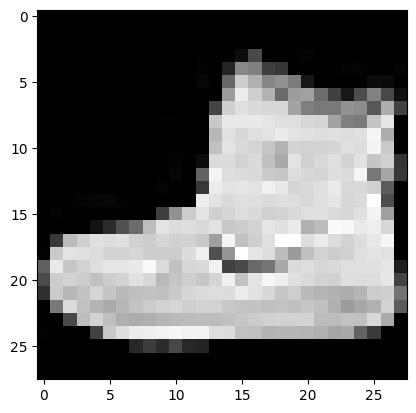

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")


In [ ]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor

tensor([[[ 1.7878e+00, -4.7805e-01, -2.4286e-01, -9.3416e-01, -2.4826e-01,
          -1.2082e+00, -4.7767e-01,  5.2013e-01, -1.5673e+00, -2.3945e-01,
           2.3228e+00, -9.6337e-01,  2.0024e+00,  4.6643e-01,  1.5730e+00,
          -9.2283e-01,  3.5586e-01, -6.8662e-01, -4.9336e-01,  2.4149e-01,
          -1.1109e+00,  9.1546e-02, -2.3169e+00, -2.1680e-01, -3.0973e-01,
          -3.9571e-01,  8.0341e-01, -6.2160e-01],
         [-5.9200e-01, -6.3074e-02, -8.2855e-01,  3.3090e-01,  3.4912e-02,
           3.2110e-01,  1.5736e+00, -8.4547e-01,  1.3123e+00,  6.8716e-01,
          -1.0892e+00, -3.5529e-01, -1.4181e+00,  8.9627e-01,  4.9905e-02,
           2.2667e+00,  1.1790e+00, -4.3445e-01, -1.3864e+00, -1.2862e+00,
          -8.3712e-01, -9.2239e-01,  1.8113e+00,  1.6056e-01,  3.6725e-01,
           1.7541e-01,  1.3852e+00, -4.4585e-01],
         [-1.2024e+00,  7.0781e-01, -1.0759e+00,  5.3565e-01,  1.1754e+00,
           5.6117e-01, -4.5275e-01, -7.7178e-01,  1.4534e-01,  2.3105e-01,


In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

torch.Size([1, 10, 7, 7])


tensor([[[[5.5402e-02, 6.2567e-02, 5.0748e-02, 4.4285e-02, 2.4768e-02,
           4.4022e-02, 6.3481e-02],
          [8.9206e-02, 6.6729e-02, 5.7853e-02, 8.4207e-02, 5.5783e-02,
           7.8124e-02, 5.5155e-02],
          [3.8122e-02, 7.1926e-02, 9.0608e-02, 7.6897e-02, 4.5881e-02,
           5.6425e-02, 3.5585e-02],
          [8.5018e-02, 6.1675e-02, 6.2221e-02, 4.6943e-02, 1.1849e-01,
           5.7723e-02, 7.4256e-02],
          [9.9684e-02, 7.6920e-02, 6.8789e-02, 6.8047e-02, 3.6737e-02,
           7.5741e-02, 9.4136e-02],
          [8.7206e-02, 3.1073e-02, 6.9525e-02, 8.3648e-02, 4.7466e-02,
           6.1926e-02, 3.5457e-02],
          [8.1734e-02, 5.4171e-02, 1.2649e-02, 7.3212e-02, 6.4736e-02,
           6.1332e-02, 7.6637e-02]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 

In [ ]:
#Training the CNN Function with our data

#Set up loss function and optimizer and eval metrics for MODEL_2
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item() #Torch.eq() claculates where 2 tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.1)


In [ ]:
# #Training and testing Model
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# from timeit import default_timer as timer
# train_time_start_on_model_2 = timer()

# epochs = 3
# for epoch in tqdm(range(epochs)):
#   print(f"Epoch: {epoch}\n-------")
#   train_step(model= model_2,
#              data_loader=train_dataloader,
#              loss_fn = loss_fn,
#              optimizer= optimizer,
#              accuracy_fn = accuracy_fn,
#              device = device)
#   test_step(model=model_2,
#             data_loader=test_dataloader,
#             loss_fn = loss_fn,
#             accuracy_fn=accuracy_fn,
#             device = device)

#   train_time_end_on_model_2 = timer()
#   total_train_time_model_2 = print_train_time(start = train_time_start_on_model_2,
#                                               end = train_time_end_on_model_2,
#                                               device = device)

#CUSTOM DATASETS

#IF WE WANNA CREATE A PYTORCH MODEL FOR OUR OWN DATASET

PYTORCH DOMAIN LIBRARIES:
1) TORCH VISION
2) TORCH TEXT
3) TORCH AUDIO
4) TORCH REC
5) TORCH DATA
6) TORCH SERVICE

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#iF THE IMAGE FOLDER DOES NOT EXIST, DOWNLAOD IT AND PREPARE IT
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True,exist_ok=True)

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  zip_ref.extractall(image_path)


data/pizza_steak_sushi directory already exists... skipping download


In [ ]:
#DATA PREPARATION AND DATA EXPLORATION

import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi.
There are 3 directories and 0 images in data/pizza_steak_sushi/test.
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi.
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza.
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak.
There are 3 directories and 0 images in data/pizza_steak_sushi/train.
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi.
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza.
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak.


In [ ]:
#Setup train and testing paths
train_dir = image_path / "train"
test_dir  = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

data/pizza_steak_sushi/test/steak/1302563.jpg
steak
Random image path: data/pizza_steak_sushi/test/steak/1302563.jpg
Image class: steak
Image height: 512
Image width: 512


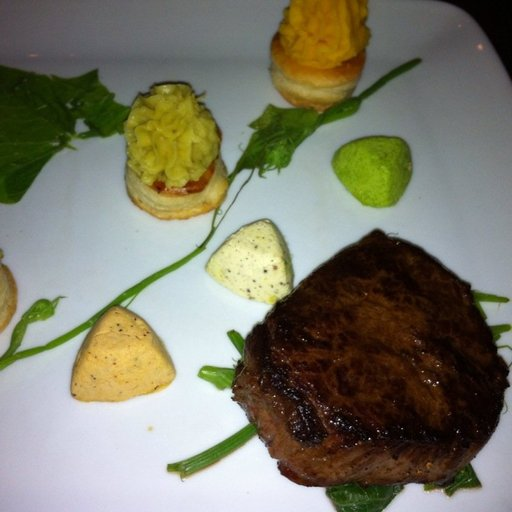

In [ ]:
#Visualizing and Image -> 1) Get all of the image paths  2) Pick a random image path  3) Get the image class name  4) Let's open the mage with python pil  5) Show image and print metadata

import random
from PIL import Image

random.seed(42)

#Get all the image paths
# ->>>>>>>glob function basicalls clubs togethers all the points in the path and put them in one list
image_path_list = list(image_path.glob("*/*/*.jpg"))

#Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

#Get image class from the path name
image_class = random_image_path.parent.stem
print(image_class)

#Open image
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

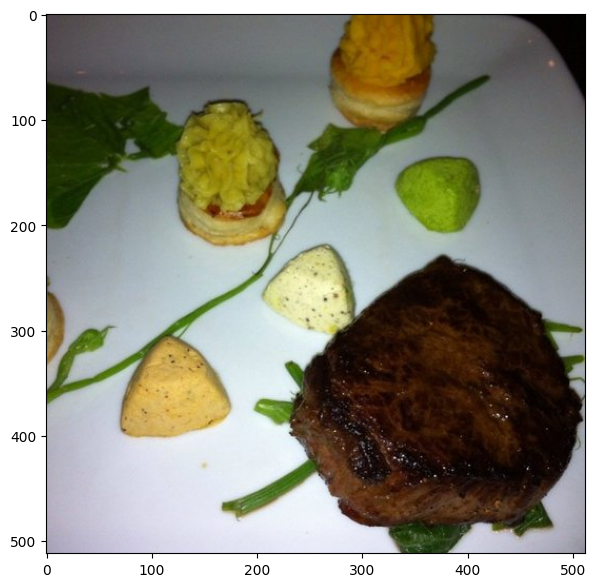

In [ ]:
#try to visualize with matplotlib

import numpy as np
import matplotlib.pyplot as plt

#Turn the image into an array
img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)


In [ ]:
img_as_array

array([[[ 76,  66,  67],
        [ 77,  67,  68],
        [ 77,  68,  71],
        ...,
        [  2,   2,   0],
        [  3,   3,   1],
        [  3,   3,   1]],

       [[ 76,  66,  67],
        [ 77,  67,  68],
        [ 77,  68,  71],
        ...,
        [  2,   2,   0],
        [  3,   3,   1],
        [  3,   3,   1]],

       [[ 75,  65,  66],
        [ 77,  67,  68],
        [ 78,  69,  72],
        ...,
        [  2,   2,   0],
        [  3,   3,   1],
        [  3,   3,   1]],

       ...,

       [[164, 159, 179],
        [164, 159, 179],
        [165, 160, 180],
        ...,
        [144, 142, 155],
        [142, 140, 153],
        [141, 139, 152]],

       [[164, 159, 179],
        [165, 160, 180],
        [165, 160, 180],
        ...,
        [145, 143, 157],
        [144, 142, 156],
        [144, 142, 156]],

       [[166, 161, 181],
        [166, 161, 181],
        [167, 162, 182],
        ...,
        [146, 144, 158],
        [147, 145, 159],
        [148, 146, 160]]

In [ ]:
#Transforming Data

#---->>>>> Before we can use our image data with pytorch we need to convert it into tensors (numerical representation of our images)
#          2) tURN IT INTO A torch.utils.data.Dataset and subsequenctly to a torch.utils.data.DataLoader (batched version of our dataset)

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
#Transforming data with torchvision.transform

data_transform = transforms.Compose([
    #Resize our images to 64x64
    transforms.Resize(size=(64,64)),
    #Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    #Turn the image into a torch tensor
    transforms.ToTensor()
])

In [ ]:
data_transform(img)

tensor([[[0.3098, 0.3098, 0.3176,  ..., 0.0118, 0.0118, 0.0078],
         [0.3137, 0.3176, 0.3216,  ..., 0.0157, 0.0118, 0.0118],
         [0.3098, 0.3255, 0.3294,  ..., 0.0196, 0.0118, 0.0118],
         ...,
         [0.6902, 0.7020, 0.7176,  ..., 0.6824, 0.6549, 0.6353],
         [0.6706, 0.6902, 0.7059,  ..., 0.6667, 0.6353, 0.6118],
         [0.6627, 0.6784, 0.6980,  ..., 0.6431, 0.6196, 0.5882]],

        [[0.2745, 0.2824, 0.2941,  ..., 0.0078, 0.0078, 0.0078],
         [0.2784, 0.2863, 0.2980,  ..., 0.0039, 0.0078, 0.0078],
         [0.2824, 0.2902, 0.3020,  ..., 0.0078, 0.0078, 0.0078],
         ...,
         [0.6627, 0.6824, 0.7020,  ..., 0.6745, 0.6510, 0.6275],
         [0.6510, 0.6706, 0.6863,  ..., 0.6627, 0.6314, 0.6039],
         [0.6431, 0.6588, 0.6784,  ..., 0.6431, 0.6196, 0.5804]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.0039, 0.0039, 0.0000],
         [0.2941, 0.3020, 0.3059,  ..., 0.0000, 0.0000, 0.0039],
         [0.2980, 0.3098, 0.3176,  ..., 0.0000, 0.0000, 0.

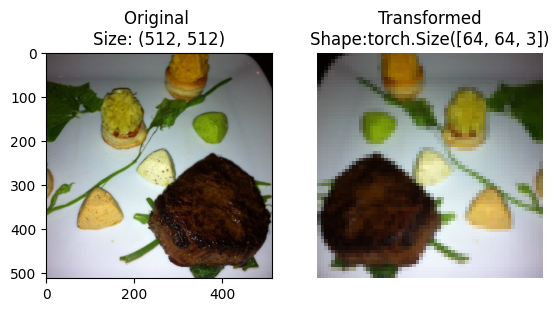

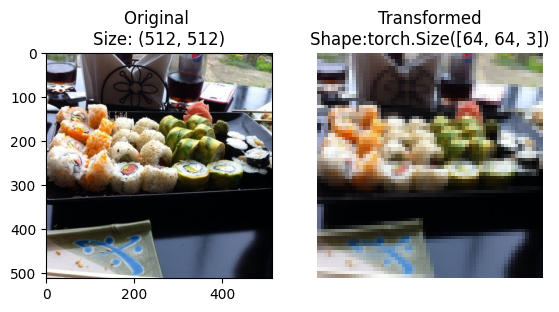

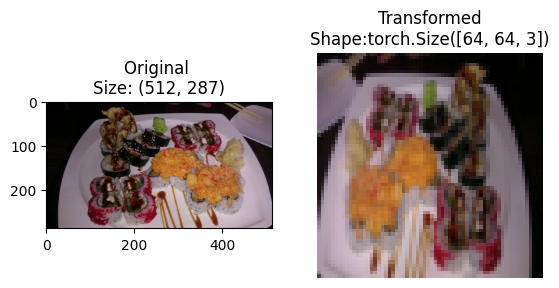

In [ ]:
#Transforms help you get your images ready for your model

def plot_transformed_images(image_paths: list,transforms, n=3,seed=None):
  """
  Selects random images from path of iamges. Plots original and the transformed version
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")

      #Transform and plot target iamge
      transformed_image = transforms(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape:{transformed_image.shape}")
      ax[1].axis("off")

      #fig.subtitle(f"Class: {image_path.parent.stem}")

plot_transformed_images(image_paths=image_path_list,
                        transforms=data_transform,
                        n = 3,
                        seed = 42)

In [ ]:
#LOADING IMAGE DATA USING IMAGE FOLDER

#USE IMAGE FOLDER USING CREATE DATASET (S)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform= data_transform,  #transform the data
                                  target_transform= None)     #transform the target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
#Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
#Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [ ]:
#Index on the train_data dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
img

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [ ]:
print(f"Image tensor: \n{img}")
print(f"timage shape: {img.shape}")
print(f"image datatype: {img.dtype}")
print(f"image label: {label}")
print(f"Label datatype: {type(label)}")


Image tensor: 
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

In [ ]:
#Rearrange the order dimensions since matplotlib likes color channels last
img_permute = img.permute(1,2,0)

print(img_permute.shape)

torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

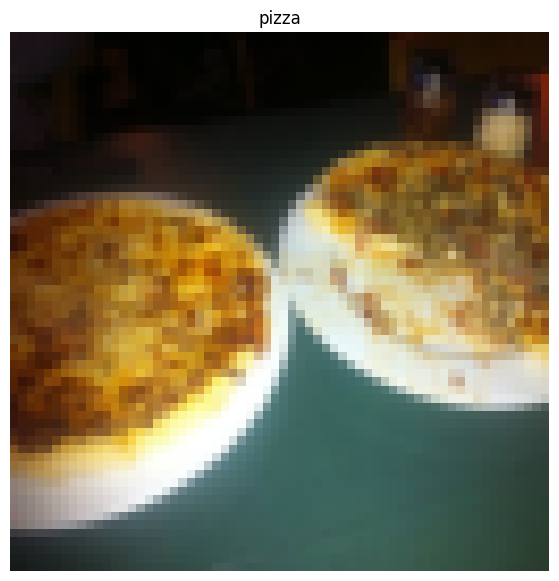

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label])


In [ ]:
#Turning our image dataset into a image Dataloader
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=os.cpu_count(),
                              shuffle = True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size = 1,
                             num_workers=1,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7893e023f940>,
 <torch.utils.data.dataloader.DataLoader at 0x7893e023f0a0>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [ ]:
img, label = next(iter(train_dataloader))

#Batch size will not be 1, you can change the batch size if you like
print(f"Image shape: {img.shape}")
print(f"Label shape : {label.shape}")

Image shape: torch.Size([1, 3, 64, 64])
Label shape : torch.Size([1])


#If we don't have pytorch imagefolder built in -> How would we create a custmized Data Loader to use with Pytorch model

Pros:
1) Can create a dataset out of almost anything
2) Not limited to pytorch pre-built dataset function

Cons:
1) Even though you could create Dataset out of anything, does not mean it will work
2) Write more code, which could effect performance and lead to more errors

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset  #All custom datasets in pytorch need to Subclass Dataset Class (Abstract class defined in the Pytorvh framework)
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
#Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
#Creating a helper function to get Class names

# 1) Get the class names using os.scandir() to traverse a target directory
# 2) Raise an error is class names are not found
# 3) Turn the class names into a dict and a list and return them

target_directory = train_dir
print(f"Targer dir: {target_directory}")

#Get class names from target directory
class_names_found = sorted(entry.name for entry in list(os.scandir(target_directory)))
class_names_found

Targer dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory:str) -> Tuple[List[str],Dict[str,int]]:
  #Get class names from target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes:
    raise FileNotFoundError(f"Could not find any classes in {directory}... Please check file structure.")

  class_to_idx = {class_name: i for i,  class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
#Create a custom Dataset class to replicate ImageFolder
from torch.utils.data import Dataset

#Subclass Dataset class
class ImageFolderCustom(Dataset):
  #Initialize our custom dataset
  def __init__(self,targ_dir:str, transform=None):
    #Create class attributes
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

  #Create a function to load images
  def load_images(self,index:int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  #Overwrite len method
  def __len__(self) -> int:
    return len(self.paths)

  #Overwrite get_item method
  def __getitem__(self, index:int) -> Tuple[torch.Tensor,int]:
    img = self.load_images(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img),class_idx

    return img, class_idx

In [ ]:

train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
#Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                      transform=test_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7893dfdab9a0>,
 <__main__.ImageFolderCustom at 0x7893dfda9120>)

In [ ]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
#Check for equality between original ImageFolder dataset and ImageFolderCustom Dataset
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True


In [ ]:
#Create a functin to display random Images

# 1) Create a function to take in a dataset
def display_random_images(dataset:torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  if n > 10:
    n = 10
    display_shape = False
    print(f"N should not be larger than 10, setting to 10 and removing shape display")

  if seed:
    random.seed(seed)

  #Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)),k=n)

  plt.figure(figsize=(16,8))

  #Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    targ_image_adjust = targ_image.permute(1,2,0)

    plt.subplot(1,n,i+1)

    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title= f"Class {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)



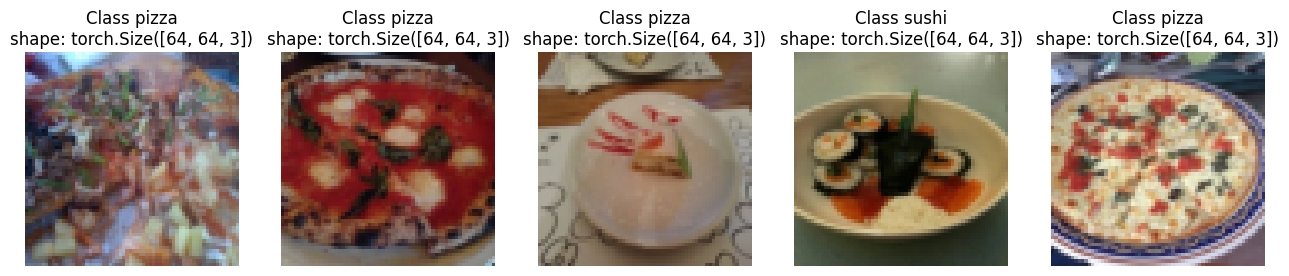

In [ ]:
display_random_images(train_data,n=5, classes=class_names,seed=None)

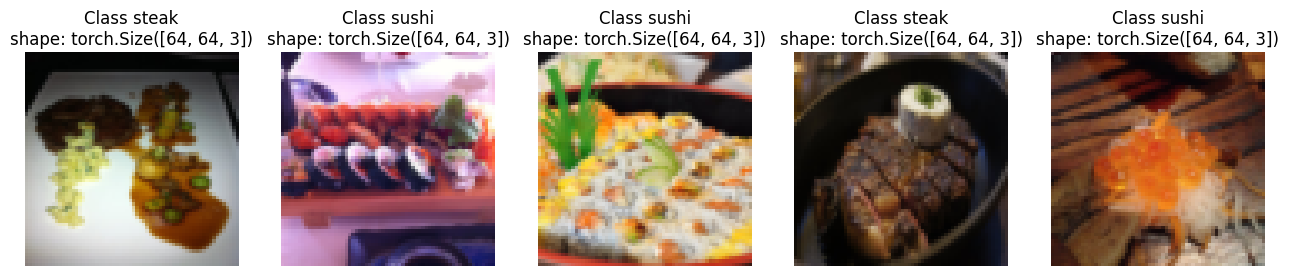

In [ ]:
display_random_images(train_data_custom,
                      n= 5,
                      classes = class_names,
                      seed=42)

In [ ]:
#Convert our Dataset into Dataloaders
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size = BATCH_SIZE,
                                     num_workers= 1,
                                     shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers= os.cpu_count(),
                                    shuffle = False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7893dc93b2e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7893d8a03d30>)

In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

DATA AUGMENTATION > Technique used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data

 -> In case of image data. this mean applying various image transformation (eg: Rotate, zoom, shift et)

In [ ]:
#Let's look at trivial Augment
from torchvision import transforms

train_transform = transforms.Compose(
    [transforms.Resize(size=(224,224)),
     transforms.TrivialAugmentWide(num_magnitude_bins=31),
     transforms.ToTensor()]
)

test_transform = transforms.Compose(
    [transforms.Resize(size=(224,224)),
     transforms.ToTensor()]
)

In [ ]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1987407.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1742201.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2715127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2394442.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1600999.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1680893.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1172255.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1230335.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2741434.jpg')]

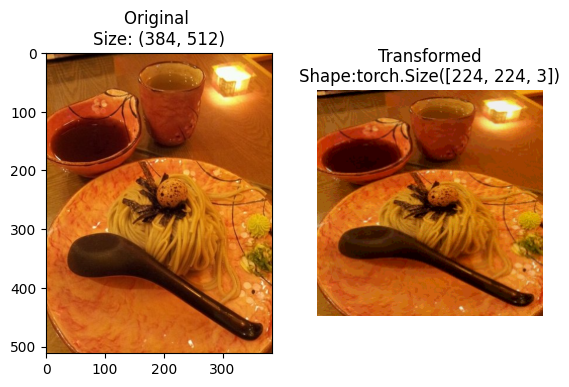

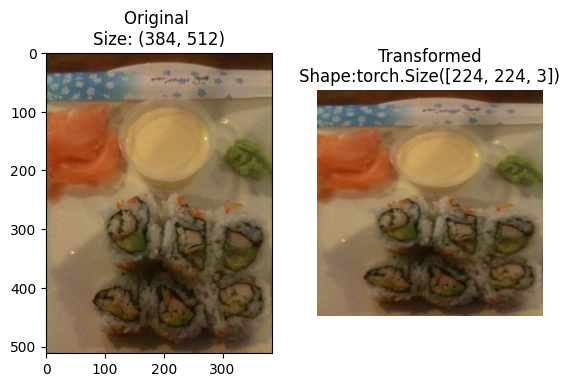

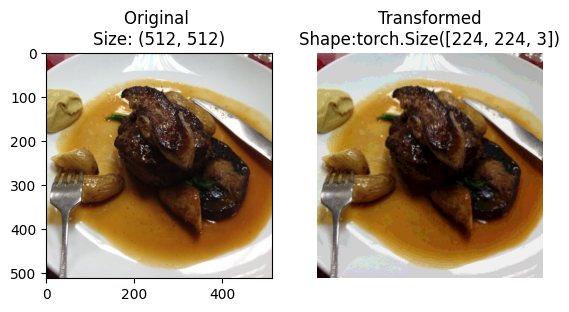

In [ ]:
plot_transformed_images(
    image_paths = image_path_list,
    transforms=train_transform,
    n = 3,
    seed=None
)

Model 0: Tiny VGG without data augmentation

Initiall we will not use data sugmentation in the baseline model. Later we will use it to see if the performance of our model further imporoves on using the DATA AUGMENTATION METHOD.

In [ ]:
##CREATING TRANSFORMS AND LOADING DATA FOR MODEL 0

simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform = simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

#Turn the datasets into Dataloaders
import os
from torch.utils.data import DataLoader

#Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

#Create Dataloaders
train_dataloader_simple = DataLoader(dataset = train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=False,
                                     num_workers=NUM_WORKERS)


In [ ]:
##Create TinyVGG model class
class TinyVGG(nn.Module):
  def forward(self,x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

  def __init__(self,input_shape:int,
               hidden_units:int,
               output_shape:int) -> None:
               super().__init__()
               self.conv_block_1 = nn.Sequential(
                   nn.Conv2d(in_channels=input_shape,
                             out_channels = hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=0),
                   nn.ReLU(),
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels = hidden_units,
                             kernel_size = 3,
                             stride=1,
                             padding = 0),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=2,
                                stride=2)
               )

               self.conv_block_2 = nn.Sequential(
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels = hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=0),
                   nn.ReLU(),
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels = hidden_units,
                             kernel_size = 3,
                             stride=1,
                             padding = 0),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=2,
                                stride=2)
               )

               self.classifier = nn.Sequential(
                   nn.Flatten(),
                   nn.Linear(in_features=hidden_units*13*13,
                             out_features=output_shape)
               )




In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
#CHECK DUMMY DATA to check the model

image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
#Try a forward pass
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [ ]:
#Getting a summary of our model with Torchinfo
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary_model_0 = summary(model_0,input_size=[1,3,64,64])
summary_model_0

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:
# CREATE TRAIN AND TEST LOOP FUNCTIONS

def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  model.train()

  train_loss, train_acc = 0,0

  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)

    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backwards()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  model.eval()

  test_loss, test_acc = 0,0

  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      test_pred_logits = model(X)

      loss = loss_fn(test_pred_logits,y)
      test_loss += loss.item()

      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)

  return test_loss, test_acc

In [ ]:
#Create a function to combine train and test step
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int=5):
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  for epoch in tqdm(range(epochs)):
    train_loss,train_acc = train_step(model=model,
                                      dataloader = train_dataloader,
                                      loss_fn = loss_fn,
                                      optimizer = optimizer,
                                      device = device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device = device)
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss {test_loss:.4f} | test acc {test_acc:.4f}")
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

In [ ]:
## Train and evaluate MODEL 0
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape = len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr = 0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn=loss_fn,
                        epochs = NUM_EPOCHS)

end_time = timer()

print(f"Total trainning time: {end_time - start_time} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

TypeError: ignored